# Semianr 8 - Applied Quantitative Logistics

## Particle Swarm Optimization (PSO) - Continuous

In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Problem:** Sphere

$$
\min{z} = f_{sph}(x) = \begin{equation*}
 \sum_{i=1}^n {x_i}^2 \end{equation*}
$$

$$
x_{min} \le x_i \le x_{max}
$$

Optimal Solutions:

$$
\forall i \;
\left\{
    \begin{array}\\
        x_i^* = 0 \\
        z^* = 0 \\
    \end{array}
\right.
$$

In [2]:
def sphere(x):
    global NFE
    
    if pd.isna(NFE):
        NEF = 0
    NFE += 1
    
    z = [item**2 for item in x]
    
    return sum(z)

### PSO Algorithm - Continuous

In [9]:
### Problem definition

nVar = 1    # Number of decision variables
varMin = -5
varMax = 5

global NFE
NFE = 0

# Store the NFE into the array
nfe = [NFE]

# PSO parameters
swarmSize = 30
maxIter = 500

maxVelocity = (varMax-varMin)/10
minVelocity = -maxVelocity

# Definition of Constraint Coefficients
phi1 = 2.05
phi2 = 2.05
phi = phi1+phi2
chi = 2/(phi-2 + np.sqrt(phi**2 - 4*phi))

w = chi
C1 = phi1*chi
C2 = phi2*chi

Position, Costs, Velocity, LBPosiiton, LBCosts = [], [], [], [], []

### Initial Swarm
GBPosition = list(np.random.uniform(varMax, varMin, size=nVar))
GBCost = math.inf

GBCost_list = []

for i in range(swarmSize):
    Position.append(list(np.random.uniform(varMin, varMax, size=nVar)))
    Velocity.append(list(np.zeros(nPar)))
    Costs.append(sphere(Position[i]))
    
    LBPosiiton.append(Position[i])
    LBCosts.append(Costs[i])
    
    if LBCosts[i] < GBCost:
        GBPosition = LBPosiiton[i]
        GBCost = LBCosts[i]

### PSO Main Loop
for it in range(maxIter):
    
    for ii in range(swarmSize):
        
        # Velocity Update
        Velocity[ii] = list(w*np.array(Velocity[ii]) \
                           + C1*np.random.random()*(np.array(LBPosiiton[ii]) - np.array(Position[ii]))
                           + C2*np.random.random()*(np.array(GBPosition) - np.array(Position[ii])))
        
        # Position Update
        Position[ii] = list(np.array(Position[ii]) + np.array(Velocity[ii]))\
        
        Costs[ii] = sphere(Position[ii])
        
        # Global and Local Best Update
        if Costs[ii] < LBCosts[ii]:
            LBPosiiton[ii] = Position[ii]
            LBCosts[ii] = Costs[ii]
            
        if LBCosts[ii] < GBCost:
            GBPosition = LBPosiiton[ii]
            GBCost = LBCosts[ii]
            
    GBCost_list.append(GBCost)
        
    # Append NFE to array
    nfe.append(NFE)
        
    print(f'Iteration {it} : NFE = {nfe[-1]}, Best Cost = {GBCost_list[it]}')

Iteration 0 : NFE = 60, Best Cost = 0.14864446613394441
Iteration 1 : NFE = 90, Best Cost = 0.14864446613394441
Iteration 2 : NFE = 120, Best Cost = 0.14864446613394441
Iteration 3 : NFE = 150, Best Cost = 0.14864446613394441
Iteration 4 : NFE = 180, Best Cost = 0.14864446613394441
Iteration 5 : NFE = 210, Best Cost = 0.14864446613394441
Iteration 6 : NFE = 240, Best Cost = 0.013042366522583814
Iteration 7 : NFE = 270, Best Cost = 0.013042366522583814
Iteration 8 : NFE = 300, Best Cost = 0.0058166905050678185
Iteration 9 : NFE = 330, Best Cost = 0.002162709282431681
Iteration 10 : NFE = 360, Best Cost = 0.002162709282431681
Iteration 11 : NFE = 390, Best Cost = 0.0017575707361927775
Iteration 12 : NFE = 420, Best Cost = 0.0009805226013651148
Iteration 13 : NFE = 450, Best Cost = 0.0009805226013651148
Iteration 14 : NFE = 480, Best Cost = 0.0002615023328700924
Iteration 15 : NFE = 510, Best Cost = 0.0002615023328700924
Iteration 16 : NFE = 540, Best Cost = 2.1356554013107566e-05
Iterati

Iteration 371 : NFE = 11190, Best Cost = 8.755430972449856e-40
Iteration 372 : NFE = 11220, Best Cost = 8.755430972449856e-40
Iteration 373 : NFE = 11250, Best Cost = 8.755430972449856e-40
Iteration 374 : NFE = 11280, Best Cost = 8.755430972449856e-40
Iteration 375 : NFE = 11310, Best Cost = 8.755430972449856e-40
Iteration 376 : NFE = 11340, Best Cost = 8.755430972449856e-40
Iteration 377 : NFE = 11370, Best Cost = 8.755430972449856e-40
Iteration 378 : NFE = 11400, Best Cost = 8.755430972449856e-40
Iteration 379 : NFE = 11430, Best Cost = 8.755430972449856e-40
Iteration 380 : NFE = 11460, Best Cost = 2.824906570106828e-40
Iteration 381 : NFE = 11490, Best Cost = 2.824906570106828e-40
Iteration 382 : NFE = 11520, Best Cost = 2.824906570106828e-40
Iteration 383 : NFE = 11550, Best Cost = 2.824906570106828e-40
Iteration 384 : NFE = 11580, Best Cost = 2.824906570106828e-40
Iteration 385 : NFE = 11610, Best Cost = 2.824906570106828e-40
Iteration 386 : NFE = 11640, Best Cost = 2.824906570106

Text(0, 0.5, 'Costs')

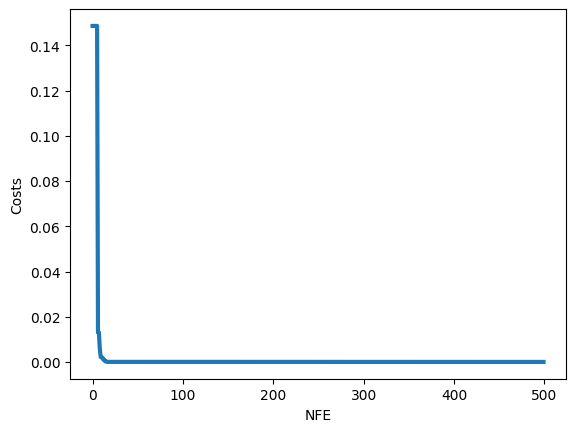

In [10]:
# Plot the result
plt.plot(GBCost_list, linewidth=3)
plt.xlabel('NFE')
plt.ylabel('Costs')